# Pareto

In [73]:
from scipy.stats import pareto
pareto.rvs(0.5,
                        loc=0,
                        scale=1,
                        size=50,
                        random_state=None,
                    )*100

array([1.85347817e+02, 1.05033880e+02, 2.34802525e+03, 1.45784683e+02,
       1.02944513e+02, 3.62975930e+03, 2.23559980e+03, 3.20404495e+02,
       1.54971648e+02, 3.57275985e+02, 1.77522349e+02, 1.05759616e+03,
       1.39795634e+02, 4.66450597e+02, 1.98296310e+02, 1.56288506e+03,
       6.57307311e+02, 2.25741705e+02, 4.93047286e+02, 1.42690261e+02,
       1.33882649e+02, 1.06899677e+02, 6.15640315e+02, 1.82430386e+03,
       3.28044409e+02, 1.57550906e+02, 4.20637137e+02, 2.37889031e+03,
       1.82537336e+02, 9.17037534e+02, 1.44006804e+03, 1.27250264e+02,
       3.92073650e+02, 3.96589127e+04, 6.00403934e+02, 1.97043495e+02,
       1.14338720e+03, 4.20060846e+02, 7.55616597e+02, 1.44562022e+02,
       2.69618412e+04, 3.27473816e+02, 3.54472153e+03, 1.26604089e+04,
       1.18409109e+02, 7.09563436e+02, 7.36947121e+02, 5.00827084e+06,
       1.71119223e+02, 1.03585075e+02])

# building of the shocks with normal law for the relative changes / returns
it means the returns are stationary but not deposits process which is a pure random walk log normal

In [3]:
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# define middle of the list of banks
deposits = np.random.rand(int(1e5))*500
plt.hist(deposits)
N_max = len(deposits) - len(deposits) % 2  # can not apply a shock on
# one bank if odd nb
N_half = int(len(deposits) / 2)

In [ ]:
rho_1 = stats.truncnorm(
            (norm_lower - mu) / vol, (norm_upper - mu) / vol, loc=mu, scale=vol
        ).rvs(N_half)

In [ ]:
vol = 0.3
mu=0
norm_lower=-1
norm_upper=0

rho_1 = stats.truncnorm(
        (norm_lower - mu) / vol,
        (norm_upper - mu) / vol,
        loc=mu,
        scale=vol).rvs(N_half)
plt.figure(figsize=(15,5))
bin = plt.hist(rho_1, bins =200)
print(np.mean(rho_1),np.var(rho_1), np.max(rho_1), np.min(rho_1))

In [ ]:
# apply a positive relative shock on the second half of the banks
rho_2 = -rho_1 * deposits[0:N_half] / deposits[N_half:N_max]
plt.figure(figsize=(15,5))
bin = plt.hist(rho_2, bins =200)
print(np.mean(rho_2),np.var(rho_2), np.max(rho_2), np.min(rho_2))

In [ ]:
# concatenate the relative shocks
if len(deposits) > N_max:
    rho = np.concatenate([rho_1, rho_2, [0]])
elif len(deposits) == N_max:
    rho = np.concatenate([rho_1, rho_2])
else:
    assert False, ""

print(np.mean(rho),np.var(rho), np.max(rho), np.min(rho))
plt.figure(figsize=(15,5))
bin = plt.hist(rho, bins =200)


In [ ]:
# compute the absolute shock from the deposit amount
shocks = deposits * rho
plt.figure(figsize=(15,5))
bin = plt.hist(shocks, bins =200)

we do obtain something close to a log normal for the distribution of the deposits 

In [ ]:
# compute the new deposits
new_deposits = deposits + shocks
plt.figure(figsize=(15,5))
bin = plt.hist(new_deposits, bins =200)

# Comparison of diffusions shocks types
the processus for the deposits is non stationary in any case but lux proposes to add a mean reverting component to make it more realistic
not implemented yet

9.916938292829562 0.002624439085201063 10.017107247369722 9.82719444770942
2.294230904884009 2.6643906756058824e-05 2.3042943561081737 2.2851534862720846
2.3025850929983007 1.2497265581573788e-15 2.302585302245282 2.3025848965022875
2.302585095494249 1.3336663146872727e-10 2.3026382206178497 2.3025306595739274


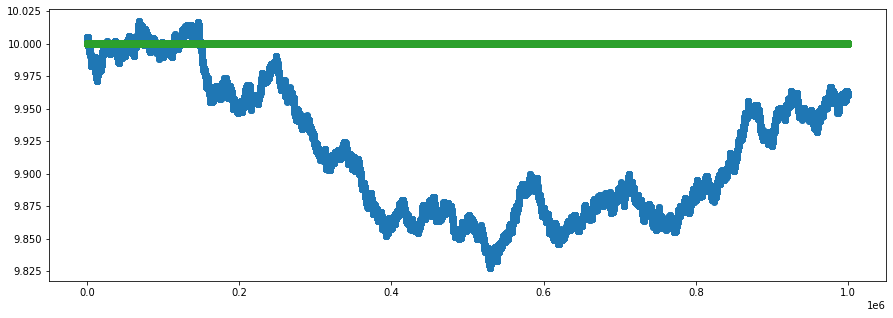

In [81]:
walk = np.zeros(int(1e6))
walk[0] = 10
walk_p = np.zeros(int(1e6))
walk_p[0] = 10
walk_mr = np.zeros(int(1e6))
walk_mr[0] = 10

for i in range(1,int(1e6)):
    # not mean reverting
    walk[i] = walk[i-1] + walk[i-1]*np.random.normal(scale=0.00001)

    # equivalent to log normal approach
    walk_p[i] = walk_p[0]*np.exp(-0.5*(0.00001**2)*np.random.normal(scale=np.sqrt(i)))

    # mean reverting
    walk_mr[i] = walk_mr[i-1] + 0.5*(10-walk_mr[i-1]) + walk_mr[i-1]*np.random.normal(scale=0.00001)

plt.figure(figsize=(15,5))
plt.plot(walk,'o-')
plt.plot(walk_p,'o-')
plt.plot(walk_mr,'o-')

print(np.mean(walk),np.var(walk), np.max(walk), np.min(walk))
print(np.mean(np.log(walk)),np.var(np.log(walk)), np.max(np.log(walk)), np.min(np.log(walk)))
print(np.mean(np.log(walk_p)),np.var(np.log(walk_p)), np.max(np.log(walk_p)), np.min(np.log(walk_p)))
print(np.mean(np.log(walk_mr)),np.var(np.log(walk_mr)), np.max(np.log(walk_mr)), np.min(np.log(walk_mr)))


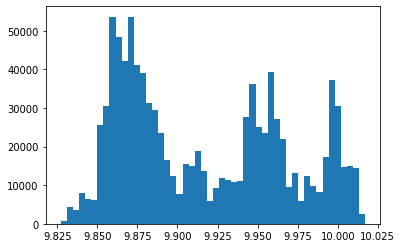

In [82]:
bin  = plt.hist(walk, bins=50)


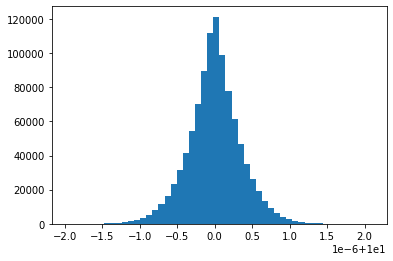

In [83]:
bin  = plt.hist(walk_p, bins=50)


In [71]:
walk_p

array([1.00000000e+01, 1.18901736e+01, 8.32428711e+00, ...,
       7.11174097e+05, 2.94536566e-16, 7.11797006e+75])

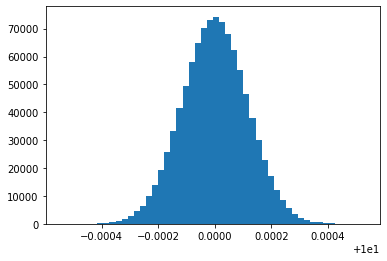

In [84]:
bin  = plt.hist(walk_mr, bins=50)

# Analysis beta init issue

In [1]:
import shocks as sh
from network import ClassNetwork
import numpy as np

In [2]:
network = ClassNetwork(
    n_banks=3,
    alpha=0.01,
    beta_init=100,
    beta_reg=0.1,
    beta_star=0.1,
    gamma=0.03,
    collateral_value=1.0,
    initialization_method="constant",
    alpha_pareto=1.3,
    shocks_method="bilateral",
    shocks_law="normal",
    shocks_vol=0.01,
    result_location="./results/test/",
    min_repo_trans_size=1e-10,
    )

network.banks

c:\Users\VictorLeCoz\OneDrive - Quant Decisions S.L\Documents\PhD\secured-inter-bank-network\network.py:569: RuntimeWarning: invalid value encountered in double_scalars
  np.sum(weighted_repo_maturity) / total_repo_amount
c:\Users\VictorLeCoz\OneDrive - Quant Decisions S.L\Documents\PhD\secured-inter-bank-network\network.py:727: RuntimeWarning: invalid value encountered in double_scalars
  self.single_trajectory["Repos av. maturity"][-1] = np.sum(


In [7]:
gamma = 0.5
1/(1-gamma) - 0.01

1.99

# cpu count

In [1]:
import os
os.cpu_count()

36

# non conservative shocks

In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
def generate_non_conservative_shocks(deposits, initial_deposits, total_assets, law, vol):
    if law == "log-normal":
        std_control = np.sqrt(np.log(1.0 + vol**2.0))
        new_deposits = (
            np.random.lognormal(
                mean=-0.5 * std_control**2,
                sigma=std_control,
                size=len(deposits),
            )
            * deposits
        )
        shocks = new_deposits - deposits
    elif law == "normal":
        new_deposits = np.maximum(deposits + np.random.randn(len(deposits)) * vol, 0.0)
        shocks = new_deposits - deposits

    elif law == "normal-mean-reverting":
        mean_reversion = 1
        epsilon = np.random.normal(loc=0,scale=vol,size=len(deposits))
        shocks = mean_reversion * (initial_deposits-deposits) + epsilon*total_assets
    else:
        assert False, ""
    
    shocks = shocks -np.mean(shocks)
    return shocks

In [7]:
deposits = np.random.rand(int(50))*100
initial_deposits = np.random.rand(int(50))*100
total_assets = deposits
law = "normal-mean-reverting"
vol = 0.05
shocks = generate_non_conservative_shocks(deposits, initial_deposits, total_assets, law, vol)


(array([4., 5., 4., 2., 7., 6., 7., 8., 2., 5.]),
 array([-74.75353562, -60.36456496, -45.9755943 , -31.58662364,
        -17.19765299,  -2.80868233,  11.58028833,  25.96925899,
         40.35822965,  54.74720031,  69.13617097]),
 <BarContainer object of 10 artists>)

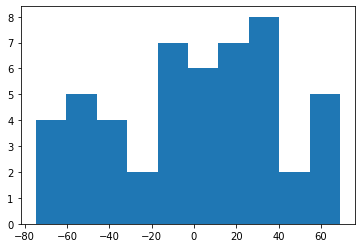

In [8]:
plt.hist(shocks)

26.983093114378335

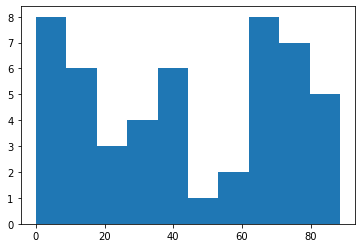

In [9]:
new_deposits = (deposits + shocks).clip(min=0)
bin = plt.hist(new_deposits)
np.sum(new_deposits)-np.sum(deposits)

## time serie dynamics generated by non conservative shocks
target: get total deposits / assets below 1e3 after 10 000 steps

In [8]:
import numpy as np
import pandas as pd
from scipy.stats import pareto
from matplotlib import pyplot as plt

In [9]:
def generate_non_conservative_shocks(
    deposits, initial_deposits, total_assets, law, vol
):
    if law == "log-normal":
        std_control = np.sqrt(np.log(1.0 + vol**2.0))
        new_deposits = (
            np.random.lognormal(
                mean=-0.5 * std_control**2,
                sigma=std_control,
                size=len(deposits),
            )
            * deposits
        )

    elif law == "normal":
        new_deposits = np.maximum(deposits + np.random.randn(len(deposits)) * vol, 0.0)

    elif law == "normal-mean-reverting":
        mean_reversion = vol
        epsilon = np.random.normal(loc=0, scale=vol, size=len(deposits))
        shocks = mean_reversion * (initial_deposits - deposits) + epsilon * total_assets

        # center the shocks
        shocks = shocks - np.mean(shocks)

        # clip the negative shocks to the deposits size
        new_deposits = (deposits + shocks).clip(min=0)

    else:
        assert False, ""

    shocks = new_deposits - deposits
    return shocks

In [10]:
# define parameters
# deposits = np.random.rand(int(50))*100
# initial_deposits = np.random.rand(int(50))*100
deposits = pareto.rvs(
    1.3,
    loc=0,
    scale=1,
    size=50,
    random_state=None,
    )* 40.0

initial_deposits = pareto.rvs(
    1.3,
    loc=0,
    scale=1,
    size=50,
    random_state=None,
    )* 40.0
total_assets = deposits
law ="normal-mean-reverting"
vol = 0.3

In [11]:
# run analysis

deposits_time_serie = pd.DataFrame(columns=range(50),index=range(30000))

for step in range(30000):
    shocks = generate_non_conservative_shocks(deposits, initial_deposits, deposits, law, vol)
    deposits = deposits + shocks
    deposits_time_serie.loc[step] = deposits
    


<AxesSubplot:>

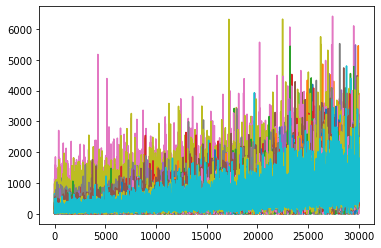

In [12]:
deposits_time_serie.plot(legend=False)

# gethostname

In [ ]:
from socket import gethostname
gethostname()

'srv006542.fr.cfm.fr'

# data frame test

In [1]:
import pandas as pd
ind = pd.MultiIndex.from_tuples([], names=(u'one', u'two', u'three'))
df = pd.DataFrame(columns=['alpha', 'beta'], index=ind)
df.loc["bank a","transaction 1",0.12587] = [0.2,True]
df.loc["bank a","transaction 1",0.55782] = [0.4,True]
df.loc["bank a","transaction 1",0.6354] = [0.5,False]
df.loc["bank a","transaction 1",354] = [0.6,False]
df.loc["bank e","transaction 4",3543] = [0.7,False]
df

alpha   beta
one    two           three                   
bank a transaction 1 0.12587       0.2   True
                     0.55782       0.4   True
                     0.63540       0.5  False
                     354.00000     0.6  False
bank e transaction 4 3543.00000    0.7  False

In [6]:
df.loc[:,"transaction 1",:]

alpha   beta
one    three                  
bank a 0.12587      0.2   True
       0.55782      0.4   True
       0.63540      0.5  False
       354.00000    0.6  False

In [20]:
df = pd.DataFrame(data = {"a":[True]*5,"b":range(5)})
~df["a"]

0    False
1    False
2    False
3    False
4    False
Name: a, dtype: bool

In [15]:
string_test = "dingo hello"
string_test.split(" ")[0]

'dingo'

In [8]:
list_1 =[1,2] 
list_2 =["q","b"]
for i, (j,k) in enumerate(zip(list_1,list_2)):
    print(i,j,k)

0 1 q
1 2 b


In [17]:
import graphics as gx

def convert_data(df, str_convertion):

    if str_convertion == "e-K$":
        df = np.exp(df) / 1e3
    elif str_convertion == "e":
        df = np.exp(df)
    elif str_convertion == "K$":
        df = df / 1e3
    elif str_convertion == "%":
        df = df * 100

    return df


def convert_n_format_index(df, str_format, str_convertion):

    index = df.index

    if str_convertion == "e-K$":
        index = np.exp(index) / 1e3
    elif str_convertion == "e":
        index = np.exp(index)
    elif str_convertion == "K$":
        index = index / 1e3
    elif str_convertion == "%":
        index = index * 100

    index = index.map(("{:" + str_format + "}").format)

    df.index = pd.Index(index)

    return df

convert_n_format_index(df.loc["bank a", "transaction 1"],".1f","%")

,alpha,beta
three,,
12.6,0.2,True
55.8,0.4,True
63.5,0.5,False
35400.0,0.6,False


In [20]:
df

alpha   beta
one    two           three                   
bank a transaction 1 0.12587       0.2   True
                     0.55782       0.4   True
                     0.63540       0.5  False
                     354.00000     0.6  False
bank e transaction 4 3543.00000    0.7  False

In [19]:
convert_data(df.loc["bank a", "transaction 1"],"%")

,alpha,beta
three,,
0.12587,20.0,100
0.55782,40.0,100
0.63540,50.0,0
354.00000,60.0,0


In [7]:
df.loc[["bank a", "bank b"],"beta"]

one     two            three  
bank a  transaction 1  time 56    True
bank b  transaction 2  time 57    True
Name: beta, dtype: bool

# dictionaries of arrays or dataframes

In [ ]:
import parameters as par
import numpy as np
dic_matrices = dict.fromkeys(par.matrices)
for key in dic_matrices.keys():
    dic_matrices[key] = np.zeros((3, 3)).copy()

# bug analysis

In [ ]:
import pickle

bank_id_on_balance_repos = pickle.load(open("./support/bank_id_on_balance_repos.pickle","rb"))

# df_reverse analysis

In [1]:
import pandas as pd

df_rev_repo_trans = pd.read_csv("./results/single_run_saved/df_reverse_repos.csv",index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: './results/single_run_saved/df_reverse_repos.csv'

In [ ]:
df_rev_repo_trans

,bank_id,trans_id,amount,start_step,tenor,status
owner_bank_id,,,,,,
0,414,0,2.251317e-01,71,2.0,False
0,193,0,2.177591e+00,72,24.0,False
0,414,1,0.000000e+00,71,2.0,False
0,278,0,2.047012e+00,73,3.0,False
0,474,0,1.914228e+00,73,5.0,False
...,...,...,...,...,...,...
499,431,164,3.558560e-01,2491,3.0,False
499,431,165,1.110223e-16,2494,NaN,True
499,431,166,1.131620e+00,2491,4.0,False


# float precision 


In [4]:
import numpy as np

info = np.finfo(np.float16)
print("Plus grand nombre positif : ", info.max)
print("Plus petit nombre positif : ", info.tiny)
print("Plus petit nombre négatif : ", -info.max)


Plus grand nombre positif :  65500.0
Plus petit nombre positif :  6.104e-05
Plus petit nombre négatif :  -65500.0


# itertools

In [ ]:
import itertools

def my_function(param1, param2, param3, path):
    with open(f"{path}test_param.txt", "w") as f:
            f.write(
                f"param1={param1} \n"
                f"param2={param2} \n"
                f"param3={param3} \n"
            )
    return param1 + param2 +param3
    # Your function implementation here

# Define the standard middle values for each parameter
standard_values = {
    'param1': 0,
    'param2': 0,
    'param3': 0,
    'path' : "./support/",
}

# Define the possible values for each parameter
param1_values = [0.1, 0.5, 1.0]
param2_values = [0.5, 1.0, 1.5]
param3_values = [1.0, 2.0, 3.0]

# Iterate over the combinations of parameter values
for p1, p2, p3 in itertools.product(param1_values, param2_values, param3_values):
    # Set the parameter values for this iteration
    dic_args = {
        'param1': p1,
        'param2': p2,
        'param3': p3
    }

    # Keep all other parameters fixed at their standard middle value
    for param_name in dic_args:
        if dic_args[param_name] == standard_values[param_name]:
            continue  # Skip the standard value
        params_copy = dic_args.copy()
        params_copy[param_name] = standard_values[param_name]

        # Call the function with the current parameter values
        result = my_function(**params_copy)

        # Do something with the result
        print(f"{param_name} = {dic_args[param_name]}: {result}")


# inspect get args build args

In [23]:
import inspect
def my_function(param1, param2, param3, path):
    with open(f"{path}param.txt", "w") as f:
                f.write(f"param1={param1} \n"
                f"param2={param2} \n"
                f"param3={param3} \n")

inspect.getfullargspec(my_function).args

['param1', 'param2', 'param3', 'path']

# study the arguments of a function

In [25]:
def my_function(param1, param2, param3, path):
    os.makedirs(path,exist_ok=True)
    with open(f"{path}param.txt", "w") as f:
                f.write(f"param1={param1} \n"
                f"param2={param2} \n"
                f"param3={param3} \n")

def study_function_parameter_range(function, dic_default_value, dic_ranges):
    
    for arg, range in dic_ranges.items():        
        for value in range:
            
            # create a dic_args from the default values
            dic_args = dic_default_value.copy()
            
            # set the given arg to value and the path to arg/value/
            dic_args[arg] = value
            dic_args["path"] = f"{dic_args['path']}{arg}/{value}/"
            
            # call the function with the current parameter value
            function(**dic_args)

dic_default_value = {"param1":1,"param2":2,"param3":3, "path":"./support/"}
dic_range = {"param1":[1,2,3],"param2":[4,5,6],"param3":[7,8,9]}

study_function_parameter_range(my_function, dic_default_value, dic_range)


# solution build args

In [26]:
def my_function(param1, param2, param3, path):
    os.makedirs(path,exist_ok=True)
    with open(f"{path}param.txt", "w") as f:
                f.write(f"param1={param1} \n"
                f"param2={param2} \n"
                f"param3={param3} \n")

def build_args(dic_default_value, dic_ranges):
    
    list_dic_args = []
    for arg, range in dic_ranges.items():        
        for value in range:
            
            # create a dic_args from the default values
            dic_args = dic_default_value.copy()
            
            # set the given arg to value and the path to arg/value/
            dic_args[arg] = value
            dic_args["path"] = f"{dic_args['path']}{arg}/{value}/"
            
            # call the function with the current parameter value
            list_dic_args.append(dic_args)
    
    return list_dic_args

dic_default_value = {"param1":1,"param2":2,"param3":3, "path":"./support/"}
dic_range = {"param1":[1,2,3],"param2":[4,5,6],"param3":[7,8,9]}

build_args(my_function, dic_default_value, dic_range)

[{'param1': 1, 'param2': 2, 'param3': 3, 'path': './support/param1/1/'},
 {'param1': 2, 'param2': 2, 'param3': 3, 'path': './support/param1/2/'},
 {'param1': 3, 'param2': 2, 'param3': 3, 'path': './support/param1/3/'},
 {'param1': 1, 'param2': 4, 'param3': 3, 'path': './support/param2/4/'},
 {'param1': 1, 'param2': 5, 'param3': 3, 'path': './support/param2/5/'},
 {'param1': 1, 'param2': 6, 'param3': 3, 'path': './support/param2/6/'},
 {'param1': 1, 'param2': 2, 'param3': 7, 'path': './support/param3/7/'},
 {'param1': 1, 'param2': 2, 'param3': 8, 'path': './support/param3/8/'},
 {'param1': 1, 'param2': 2, 'param3': 9, 'path': './support/param3/9/'}]

# df_plt

In [1]:
import parameters as par

par.df_plt.tail(50)

,label,legend,scale,style,convertion
item,,,,,
bank_100,deposits (monetary units),bank_100,linear,,False
bank_101,deposits (monetary units),bank_101,linear,,False
bank_102,deposits (monetary units),bank_102,linear,,False
bank_103,deposits (monetary units),bank_103,linear,,False
bank_104,deposits (monetary units),bank_104,linear,,False
bank_105,deposits (monetary units),bank_105,linear,,False
bank_106,deposits (monetary units),bank_106,linear,,False
bank_107,deposits (monetary units),bank_107,linear,,False
bank_108,deposits (monetary units),bank_108,linear,,False


In [5]:
df = par.df_plt[par.df_plt["label"].isin(["deposits (monetary units)","SELL"])]

In [7]:
par.df_plt

,label,legend,scale,style,convertion
item,,,,,
cash av. network,notional (monetary units),cash av. network,linear,,False
cash tot. network,notional (monetary units),cash tot. network,linear,,False
cash,notional (monetary units),cash,linear,,False
securities usable av. network,notional (monetary units),securities usable av. network,linear,,False
securities usable tot. network,notional (monetary units),securities usable tot. network,linear,,False
...,...,...,...,...,...
bank_145,deposits (monetary units),bank_145,linear,,False
bank_146,deposits (monetary units),bank_146,linear,,False
bank_147,deposits (monetary units),bank_147,linear,,False


In [6]:
df

,label,legend,scale,style,convertion
item,,,,,
bank_0,deposits (monetary units),bank_0,linear,,False
bank_1,deposits (monetary units),bank_1,linear,,False
bank_2,deposits (monetary units),bank_2,linear,,False
bank_3,deposits (monetary units),bank_3,linear,,False
bank_4,deposits (monetary units),bank_4,linear,,False
...,...,...,...,...,...
bank_145,deposits (monetary units),bank_145,linear,,False
bank_146,deposits (monetary units),bank_146,linear,,False
bank_147,deposits (monetary units),bank_147,linear,,False


# final step distributions

In [8]:
import powerlaw
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
import pandas as pd
import parameters as par

df_banks = pd.read_csv("./results/single_run/df_banks.csv", index_col=0)

bank_item = "total assets"
sr_data = df_banks[bank_item]
figsize=par.small_figsize

# function 

def power_law_test(data,file_name, figsize=par.small_figsize):

    # fit the data with the powerlaw librairy
    fit = powerlaw.Fit(data)

    # define the figure and colors 
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    colors = sns.color_palette("flare", n_colors=3)

    # ax1 : pdf
    fit.plot_pdf(color = colors[0], ax=ax1)
    fit.power_law.plot_pdf(color = colors[1], linestyle = "--", ax = ax1)
    fit.exponential.plot_pdf(color = colors[2], linestyle = "--", ax=ax1)
    ax1.set_xlabel(par.df_plt.loc[bank_item, "legend"])
    ax1.set_ylabel("pdf")
    ax1.grid()

    # ax2 : ccdf
    fit.plot_ccdf(color = colors[0], ax=ax2)
    fit.power_law.plot_ccdf(color = colors[1], linestyle = "--", ax = ax2)
    fit.exponential.plot_ccdf(color = colors[2], linestyle = "--", ax=ax2)
    ax2.set_xlabel(par.df_plt.loc[bank_item, "legend"])
    ax2.set_ylabel("ccdf")
    ax2.grid()

    # legend
    alpha_power_law  = fit.power_law.alpha
    alpha_power_law_fm  = "{:.1f}".format(alpha_power_law)
    R, p_value = fit.distribution_compare('power_law', 'exponential')
    p_value_fm  = "{:.1f}".format(p_value)
    ax2.legend(["data",r"power law fit, $\alpha =$" + f"{alpha_power_law_fm}, p-value = {p_value_fm}","exponential"], loc="upper left",bbox_to_anchor=(1.0, 1.0))

    # adjust the space between the 2 charts
    plt.subplots_adjust(wspace=0.4)

    plt.savefig(f"{file_name}.pdf", bbox_inches="tight")
    plt.close()

    return alpha_power_law, p_value


def plot_step_all_power_law(df_banks, path, figsize=par.small_figsize):

    df_power_law = pd.DataFrame(index=df_banks.columns, columns=["alpha_power_law","p_value"])

    for col in df_banks.columns:

        # define data
        data = df_banks[col]

        # check that some data exists
        if max(data)>0: 

            # build path
            os.makedirs(f"{path}col",exist_ok=True)

            # run and plot the power law test
            df_power_law.loc[col] = power_law_test(data,f"{path}{col}", figsize=figsize)

    
    # dump to csv
    df_power_law.to_csv(f"{path}df_power_law.csv")
    
    # plot
    fig, ax1 = plt.subplots(figsize=figsize)
    colors = sns.color_palette("flare", n_colors=2)
    
    # ax1: alpha
    ax1.plot(df_power_law.index,df_power_law["alpha_power_law"], ".", color=colors[0])
    ax1.tick_params(axis="x", labelrotation=90, labelsize="small")
    ax1.set_xlabel("accounting item")
    ax1.set_ylabel(r"$\alpha$")
    ax1.legend(r"$\alpha$", loc='upper left')
    
    # ax2: p value
    ax2 =ax1.twinx()
    ax1.plot(df_power_law.index,df_power_law["p_value"],".", color=colors[1])
    ax2.set_ylabel("p-value")
    ax2.legend("p-value",loc='upper right')

    plt.grid()
    plt.savefig(f"{path}power_law_tests.pdf", bbox_inches="tight")
    plt.close()

plot_step_all_power_law(df_banks,"./support/test/")


Calculating best minimal value for power law fit
/mnt/live/user/vlecoz/conda_env/money_markets/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
Calculating best minimal value for power law fit
/mnt/live/user/vlecoz/conda_env/money_markets/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
Calculating best minimal value for power law fit
/mnt/live/user/vlecoz/conda_env/money_markets/lib/python3.8/site-packages/powerlaw.py:1141: RuntimeWarning: invalid value encountered in log
  self.alpha = 1 + (self.n / sum(log(data/self.xmin)))
/mnt/live/user/vlecoz/conda_env/money_markets/lib/python3.8/site-packages/powerlaw.py:1160: RuntimeWarning: invalid value encountered in log
  return 1 + len(data)/sum(log(data / (self.xmin)))
/mnt/live/user/vlecoz/conda_env/money_markets/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide

In [6]:
import functions as fct
fct.list_exclusion(list(df_banks.columns),par.bank_items)

['total liabilities']

In [11]:
df_banks["total assets"].name

'total assets'

In [19]:
import pandas as pd
sr_data = pd.read_csv("./support/sr_data.csv", index_col=0)

In [22]:
sr_data.abs().sum()

securities reused    8.881784e-16
dtype: float64

In [16]:
len(sr_data.dropna())

1

In [18]:
x = np.nan
if not(np.isnan(x)):
    print("dingo")

In [23]:
import pandas as pd

# Création d'un DataFrame avec une colonne existante
df = pd.DataFrame({'id': [1, 2, 3],
                   'informations': [{'nom': 'Alice', 'age': 25},
                                   {'nom': 'Bob', 'age': 30},
                                   {'nom': 'Charlie', 'age': 35}]})

# Affichage du DataFrame
print(df)


   id                   informations
0   1    {'nom': 'Alice', 'age': 25}
1   2      {'nom': 'Bob', 'age': 30}
2   3  {'nom': 'Charlie', 'age': 35}


In [24]:
df.iloc[1,1]

{'nom': 'Bob', 'age': 30}

# df_cpnet

In [45]:
df_cpnet = pd.DataFrame(
        {
            "sig_c": pd.Series([], dtype=object),
            "sig_x": pd.Series([], dtype=object),
            "significant": pd.Series([], dtype=object),
            "p_value": pd.Series([], dtype=float),
        },
        index=pd.MultiIndex.from_tuples(
            [(a,b,c) for a in range(5) for b in ["dingo", "pipi"] for c in ["a", "b"]],
            names=["agg_period", "algo", "step"],
        ),
    )

In [47]:
df_cpnet_2 = pd.DataFrame(
        columns=[f"{col}-{agg_period}-{algo}" for col in ["sig_c","sig_x","significant","p_value"] for agg_period in par.agg_periods for algo in par.cp_algos],
    )

In [48]:
df_cpnet_2

,sig_c-1-Rombach,sig_c-1-Rossa,sig_c-1-LapSgnCore,sig_c-1-MINRES,sig_c-1-Lip,sig_c-1-BE,sig_c-50-Rombach,sig_c-50-Rossa,sig_c-50-LapSgnCore,sig_c-50-MINRES,...,p_value-100-LapSgnCore,p_value-100-MINRES,p_value-100-Lip,p_value-100-BE,p_value-250-Rombach,p_value-250-Rossa,p_value-250-LapSgnCore,p_value-250-MINRES,p_value-250-Lip,p_value-250-BE


In [50]:
df_cpnet[df_cpnet_2.columns] =None
df_cpnet

sig_c sig_x significant  p_value sig_c-1-Rombach  \
agg_period algo  step                                                    
0          dingo a      NaN   NaN         NaN      NaN            None   
                 b      NaN   NaN         NaN      NaN            None   
           pipi  a      NaN   NaN         NaN      NaN            None   
                 b      NaN   NaN         NaN      NaN            None   
1          dingo a      NaN   NaN         NaN      NaN            None   
                 b      NaN   NaN         NaN      NaN            None   
           pipi  a      NaN   NaN         NaN      NaN            None   
                 b      NaN   NaN         NaN      NaN            None   
2          dingo a      NaN   NaN         NaN      NaN            None   
                 b      NaN   NaN         NaN      NaN            None   
           pipi  a      NaN   NaN         NaN      NaN            None   
                 b      NaN   NaN         NaN      NaN            None   
3          dingo a      NaN   NaN         NaN      NaN            None   
                 b      NaN   NaN         NaN      NaN            None   
           pipi  a      NaN   NaN         NaN      NaN            None   
                 b      NaN   NaN         NaN      NaN            None   
4          dingo a      NaN   NaN         NaN      NaN            None   
                 b      NaN   NaN         NaN      NaN            None   
           pipi  a      NaN   NaN         NaN      NaN            None   
                 b      NaN   NaN         NaN      NaN            None   

                      sig_c-1-Rossa sig_c-1-LapSgnCore sig_c-1-MINRES  \
agg_period algo  step                                                   
0          dingo a             None               None           None   
                 b             None               None           None   
           pipi  a             None               None           None   
                 b             None               None           None   
1          dingo a             None               None           None   
                 b             None               None           None   
           pipi  a             None               None           None   
                 b             None               None           None   
2          dingo a             None               None           None   
                 b             None               None           None   
           pipi  a             None               None           None   
                 b             None               None           None   
3          dingo a             None               None           None   
                 b             None               None           None   
           pipi  a             None               None           None   
                 b             None               None           None   
4          dingo a             None               None           None   
                 b             None               None           None   
           pipi  a             None               None           None   
                 b             None               None           None   

                      sig_c-1-Lip sig_c-1-BE  ... p_value-100-LapSgnCore  \
agg_period algo  step                         ...                          
0          dingo a           None       None  ...                   None   
                 b           None       None  ...                   None   
           pipi  a           None       None  ...                   None   
                 b           None       None  ...                   None   
1          dingo a           None       None  ...                   None   
                 b           None       None  ...                   None   
           pipi  a           None       None  ...                   None   
                 b           None       None  ...                   None   
2          dingo a        

In [1]:
import parameters as par
par.df_figures

,items,extension
file_name,,
accounting_view/macro_economic_aggregates,"[loans, central bank funding, total assets, de...",tot. network
accounting_view/collateral_aggregates,"[securities usable, securities encumbered, sec...",tot. network
accounting_view/collateral_reuse,[collateral reuse],
accounting_view/gini,[gini],
transaction_view/repo_transactions_maturity_av_network,[repo transactions maturity av. network],
transaction_view/repo_transactions_notional_av_network,[repo transactions notional av. network],
transaction_view/number_repo_transactions_av_network,[number repo transactions av. network],
exposure_view/repo_exposure_stats,"[repo exposures min network, repo exposures ma...",
exposure_view/jaccard_index,"[jaccard index-1, jaccard index-50, jaccard in...",


In [12]:
par.df_plt["format"].to_csv("test.csv")

In [19]:
import pandas as pd
df_reverse_repos = pd.read_csv("./results/sensitivity/lux_test/runs/nb_banks/175/df_network_trajectory.csv", index_col=0)

In [20]:
import functions as fct
fct.sizeof_fmt(fct.get_size(df_reverse_repos))

'89.3 MiB'

In [3]:
import numpy as np
len(np.arange(155, 260, 5))

21

In [12]:
import data_mapping as dm
import pandas as pd
from pandas.tseries.offsets import CustomBusinessDay
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday, nearest_workday


def get_closest_bday(input_timestamp):
    bbday = pd.offsets.CustomBusinessDay(holidays=dm.holidays)
    return bbday.rollforward(input_timestamp)


2023-06-05 14:30:00


# psutil

In [2]:
import psutil
psutil.virtual_memory(
)

In [3]:
import parameters as par

par.df_plt.loc["reverse repo balance"]

label         notional (monetary units)
legend             reverse repo balance
scale                            linear
style                                  
convertion                        False
Name: reverse repo balance, dtype: object

In [3]:
df_mapping.dtypes

col1     int64
col2    object
dtype: object

In [4]:
df.dtypes

col1    object
dtype: object

In [7]:
import pandas as pd
import time

# Create a sample DataFrame with a large number of unique values
df = pd.DataFrame({'col1': range(10000)})

# Create a dictionary to map values
mapping = {value: f"Value_{value}" for value in range(10000)}

# Option 1: Using pandas replace
start_time = time.time()
df['col1'] = df['col1'].replace(mapping)
elapsed_time_replace = time.time() - start_time

print(f"Elapsed time using replace: {elapsed_time_replace}")


Elapsed time using replace: 1.1971464157104492


In [8]:
# Create a sample DataFrame with a large number of unique values
df = pd.DataFrame({'col1': range(10000)})

# Option 2: Using merge with a DataFrame
df_mapping = pd.DataFrame({'col1': range(10000),
                           'col2': [f"Value_{value}" for value in range(10000)]})

start_time = time.time()
df = df.merge(df_mapping, on='col1', how='left')
df.drop(columns='col1', inplace=True)
df.rename(columns={'col2': 'col1'}, inplace=True)
elapsed_time_merge = time.time() - start_time


print(f"Elapsed time using merge: {elapsed_time_merge}")

Elapsed time using merge: 0.003985166549682617


# test the Cp net algo quality

In [22]:
cp_adj_test

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
index,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1]:
import networkx as nx
import numpy as np
import emp_metrics as em
import parameters as par
import pandas as pd

arr_adj_matrix = np.array([
                    [1,1,1,1,0,0,0,0],
                  [1,1,1,0,1,0,0,0],
                  [1,1,1,0,0,1,1,1],
                  [1,0,0,0,0,0,0,0],
                  [0,1,0,0,0,0,0,0],
                  [0,0,1,0,0,0,0,0],
                  [1,0,0,0,0,0,0,0],
                  [0,1,0,0,0,0,0,0],])

cp_adj_test = pd.read_csv("./cp_adj_test2.csv", index_col=0)
arr_adj_matrix = np.array(cp_adj_test)

# build nx object

df_cpnet_testing = pd.DataFrame(index=par.cp_algos, columns=["sig_c", "sig_x", "significant", "pvalues"])

for algo in par.cp_algos:
    bank_network = nx.from_numpy_array(
        arr_adj_matrix,
        parallel_edges=False,
        create_using=nx.DiGraph,
    )

    # run cpnet test
    sig_c, sig_x, significant, pvalues = em.step_cpnet(
        bank_network, algo=algo
    )

    df_cpnet_testing.loc[algo] = [sig_c, sig_x, significant, pvalues[0]]

100%|██████████| 100/100 [00:00<00:00, 202.81it/s]


In [4]:
df_cpnet_testing

,sig_c,sig_x,significant,pvalues
KM_ER,"{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ...","{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 0, 6: 0, 7: ...",[True],0.0
KM_config,"{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ...","{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 0, 6: 0, 7: ...",[True],0.0
Rombach,"{0: None, 1: None, 2: None, 3: None, 4: None, ...","{0: None, 1: None, 2: None, 3: None, 4: None, ...",[False],1.0
Rossa,"{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ...","{0: 0.3632286995515695, 1: 0.9385474860335196,...",[True],0.0
LapCore,"{0: None, 1: None, 2: None, 3: None, 4: None, ...","{0: None, 1: None, 2: None, 3: None, 4: None, ...",[False],0.198473
LapSgnCore,"{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ...","{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 0, 6: 0, 7: ...",[True],0.029698
LowRankCore,"{0: None, 1: None, 2: None, 3: None, 4: None, ...","{0: None, 1: None, 2: None, 3: None, 4: None, ...",[False],1.0
MINRES,"{0: None, 1: None, 2: None, 3: None, 4: None, ...","{0: None, 1: None, 2: None, 3: None, 4: None, ...",[False],1.0
Lip,"{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ...","{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 0....",[True],0.0
BE,"{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ...","{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 0, 6: 0, 7: ...",[True],0.0


In [11]:
df_cpnet_testing.loc["BE", "pvalues"]

0.0

In [5]:
sig_c, sig_x = df_cpnet_testing.loc[algo][["sig_c", "sig_x"]]

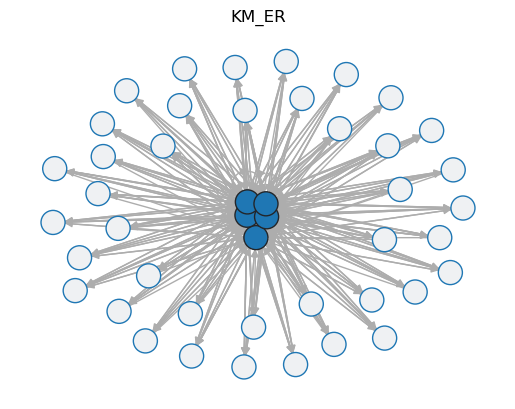

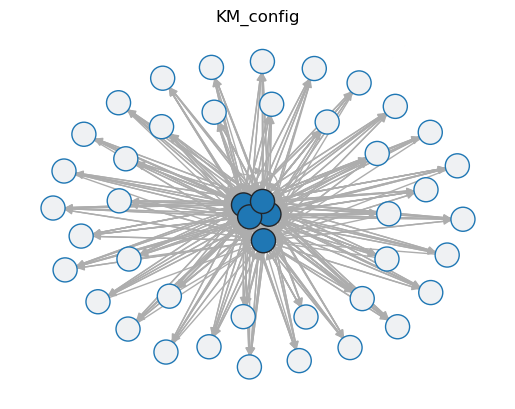

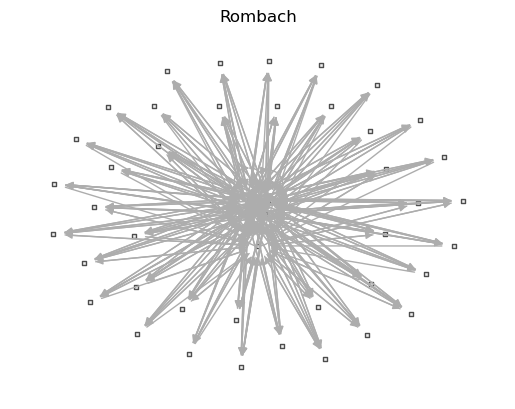

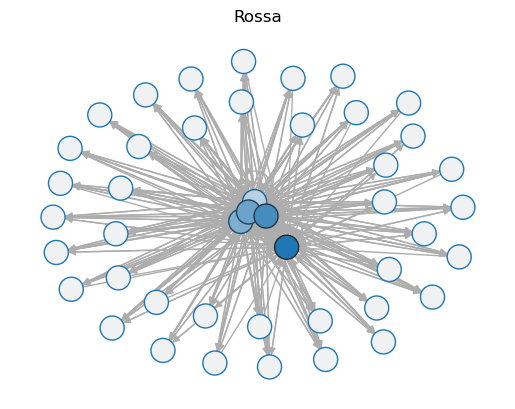

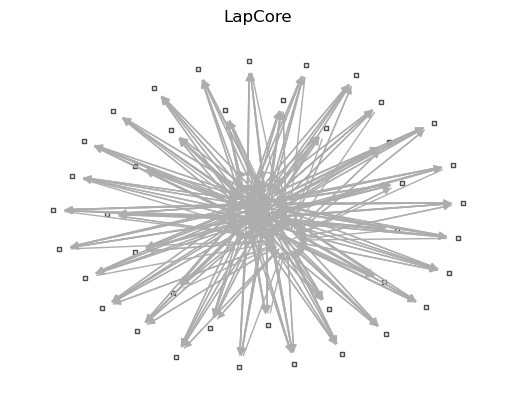

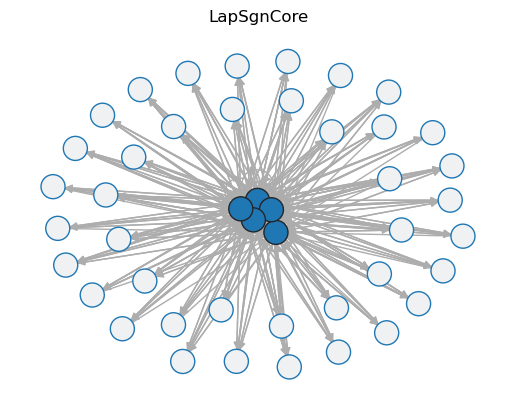

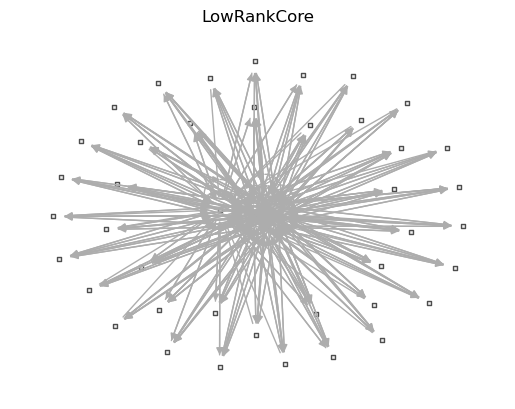

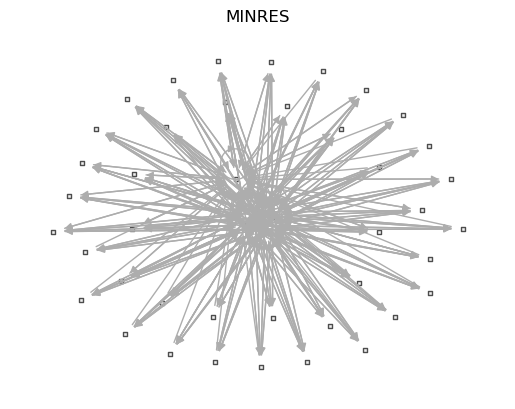

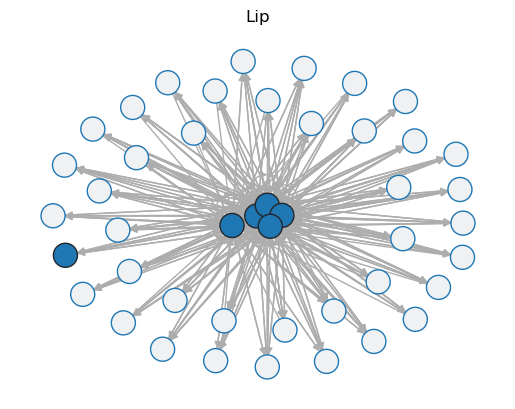

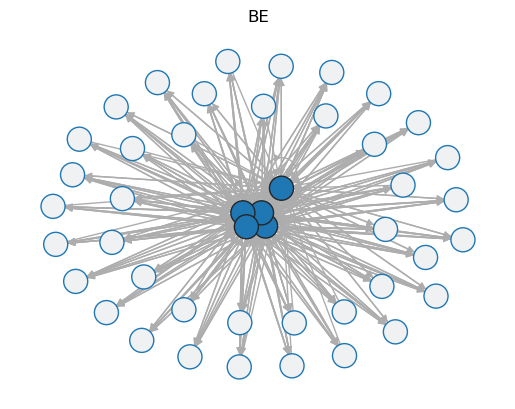

In [10]:
import cpnet
from matplotlib import pyplot as plt
bank_network = nx.from_numpy_array(
            arr_adj_matrix,
            parallel_edges=False,
            create_using=nx.DiGraph,
        )

for algo in par.cp_algos:
    
    sig_c, sig_x = df_cpnet_testing.loc[algo][["sig_c", "sig_x"]]

    # plot cp structure
    fig, ax = plt.subplots()
    ax = plt.gca()
    ax, pos = cpnet.draw(bank_network, sig_c, sig_x, ax)
    plt.title(algo)
    plt.plot()

# examples of density / histogram in log - log

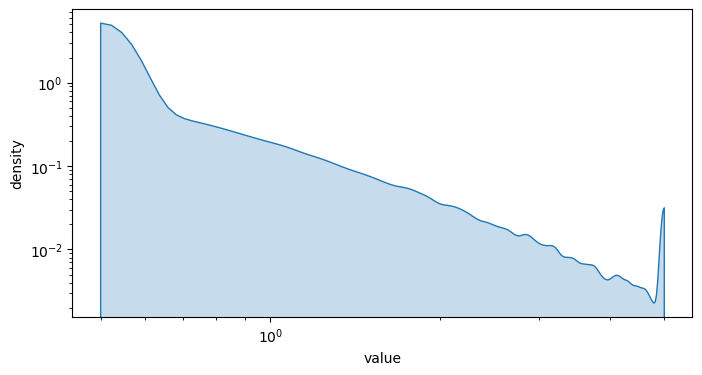

In [ ]:
# Pareto law

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate random data
x = np.random.pareto(3,size=100000)

# Compute the absolute value and sign of the data
abs_x = np.abs(x)
sign_x = np.sign(x)

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the KDE on a log scale with the transformed data
sns.kdeplot(x.clip(0.5,5), ax=ax, cut=0, fill=True)
ax.set_xscale('log')

# Set the y-axis to log scale
ax.set_yscale('log')

# Set axis labels
ax.set_xlabel('value')
ax.set_ylabel('density')

# Show the plot
plt.show()

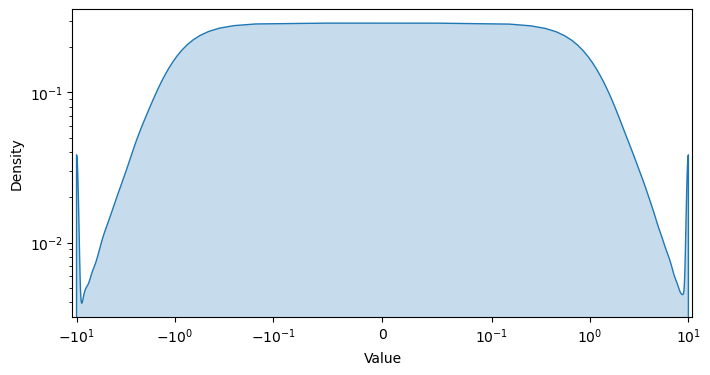

In [ ]:
# student law

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate random data
x = np.random.standard_t(1,size=100000)

# Compute the absolute value and sign of the data
abs_x = np.abs(x)
sign_x = np.sign(x)

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the KDE on a log scale with the transformed data
sns.kdeplot(x.clip(-10,10), ax=ax, fill=True, cut=0)
ax.set_xscale('symlog', linthresh=0.1)

# Set the y-axis to log scale
ax.set_yscale('log')

# Set axis labels
ax.set_xlabel('Value')
ax.set_ylabel('Density')

# Show the plot
plt.show()

# multiple histogram on the same plot

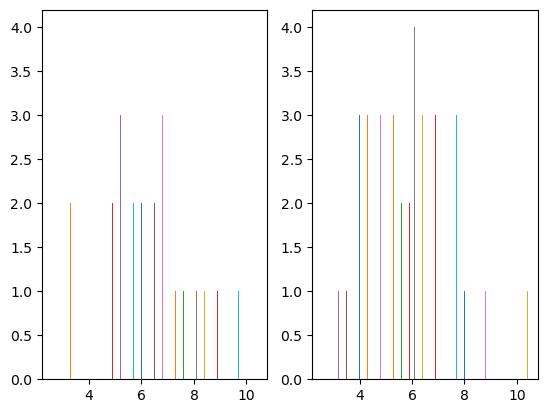

In [ ]:
from matplotlib import pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2)
pos = 0
width = 0.2
for  i in range(10):
    binary_adj = np.random.randint(0,2,(10,10))
    bank_network = nx.from_numpy_array(
                binary_adj,
                parallel_edges=False,
                create_using=nx.DiGraph,
            )  # first define a networkx object.
    ar_in_degree = np.array(bank_network.in_degree())[:,1]
    hist = np.unique(ar_in_degree, return_counts=True)
    ax1.bar(hist[0] + pos, hist[1], width=0.01)
    ax2.bar(hist[0] + pos, hist[1], width=0.01)
    pos = pos +width +0.1



# power low fitting

Calculating best minimal value for power law fit
c:\Users\VictorLeCoz\Anaconda3\envs\interbank_network\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


3.5369177709484454
2.2279074096209066


<Axes: >

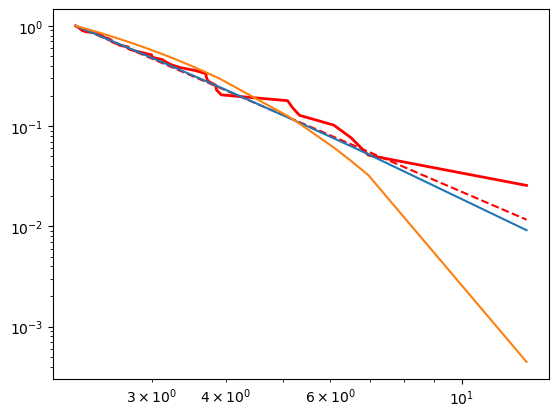

In [ ]:
# fitting
import powerlaw
import numpy as np
sr_data = np.random.pareto(3,size=1000) # data can be list or numpy array
powerlaw_fit = powerlaw.Fit(sr_data)
print(powerlaw_fit.power_law.alpha)
print(powerlaw_fit.power_law.xmin)
R, p = powerlaw_fit.distribution_compare('power_law', 'exponential')
fig2 = powerlaw_fit.plot_ccdf(color = "r", linewidth = 2)
powerlaw_fit.power_law.plot_ccdf(color = "r", linestyle = "--", ax = fig2)
powerlaw_fit.lognormal.plot_ccdf(ax=fig2)
powerlaw_fit.exponential.plot_ccdf(ax=fig2)

# build the calendar

In [ ]:
from workalendar.europe import EuropeanCentralBank

# build the list of holidays
holidays = []
for year in range(2000,2025):
    holidays = holidays + EuropeanCentralBank().holidays(year)

# reformating into a list
holidays = [tuple_day[0] for tuple_day in holidays]
holidays

[datetime.date(2000, 1, 1),
 datetime.date(2000, 4, 21),
 datetime.date(2000, 4, 24),
 datetime.date(2000, 5, 1),
 datetime.date(2000, 12, 25),
 datetime.date(2000, 12, 26),
 datetime.date(2001, 1, 1),
 datetime.date(2001, 4, 13),
 datetime.date(2001, 4, 16),
 datetime.date(2001, 5, 1),
 datetime.date(2001, 12, 25),
 datetime.date(2001, 12, 26),
 datetime.date(2002, 1, 1),
 datetime.date(2002, 3, 29),
 datetime.date(2002, 4, 1),
 datetime.date(2002, 5, 1),
 datetime.date(2002, 12, 25),
 datetime.date(2002, 12, 26),
 datetime.date(2003, 1, 1),
 datetime.date(2003, 4, 18),
 datetime.date(2003, 4, 21),
 datetime.date(2003, 5, 1),
 datetime.date(2003, 12, 25),
 datetime.date(2003, 12, 26),
 datetime.date(2004, 1, 1),
 datetime.date(2004, 4, 9),
 datetime.date(2004, 4, 12),
 datetime.date(2004, 5, 1),
 datetime.date(2004, 12, 25),
 datetime.date(2004, 12, 26),
 datetime.date(2005, 1, 1),
 datetime.date(2005, 3, 25),
 datetime.date(2005, 3, 28),
 datetime.date(2005, 5, 1),
 datetime.date(200

# analysis of ISING reporting in MMSR / underflag of evergreens

In [ ]:
df = df_mmsr_secured.groupby(["report_agent_lei","cntp_lei","trns_nominal_amt","maturity_band"]).agg({"trade_date":lambda x: list(x),"maturity_date":lambda x: list(x)})

In [ ]:
df_mmsr_secured[(df_mmsr_secured["report_agent_lei"]==14701)
                &(df_mmsr_secured["cntp_lei"]==13504)&(df_mmsr_secured["trns_nominal_amt"]==530871213.8)
                ]

,coll_isin,trns_nominal_amt,trns_type,maturity_band,unique_trns_id,trade_date,maturity_date,cntp_lei,report_agent_lei,first_date,start_step,tenor,evergreen
381195,XS0427291751,530871213.8,True,O/N,NaN,2016-05-24,2016-05-25,13504,14701,2016-01-08,95,1,True
391066,XS0427291751,530871213.8,True,O/N,NaN,2016-06-01,2016-06-02,13504,14701,2016-01-08,101,1,True
393207,XS0427291751,530871213.8,True,O/N,NaN,2016-06-02,2016-06-03,13504,14701,2016-01-08,102,1,True
395877,XS0427291751,530871213.8,True,Up to 1W,NaN,2016-06-03,2016-06-04,13504,14701,2016-01-08,103,1,True


In [ ]:
df_mmsr_secured = pd.read_csv(
        f"{path}pickle/df_mmsr_secured.csv", index_col=0
    )
for col in ["trade_date", "maturity_date"]:
        df_mmsr_secured[col] = pd.to_datetime(df_mmsr_secured[col])

C:\Users\VictorLeCoz\AppData\Local\Temp\ipykernel_24776\3848273711.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_mmsr_secured = pd.read_csv(


In [ ]:
df = df_mmsr_secured[(df_mmsr_secured["report_agent_lei"]==14701)
                &(df_mmsr_secured["cntp_lei"]==13504)
                ]

# dump 

In [ ]:
import pickle
pickle.dump(
            df_finrep_clean,
            open(f"{path}pickle/df_finrep_clean.pickle", "wb"),
            protocol=pickle.HIGHEST_PROTOCOL,
        )
pickle.dump(
            df_mmsr_unsecured,
            open(f"{path}pickle/df_mmsr_unsecured.pickle", "wb"),
            protocol=pickle.HIGHEST_PROTOCOL,
        )
pickle.dump(
            df_expanded,
            open(f"{path}pickle/df_mmsr_secured_expanded.pickle", "wb"),
            protocol=pickle.HIGHEST_PROTOCOL,
        )
pickle.dump(
            df_mmsr_secured,
            open(f"{path}pickle/df_mmsr_secured.pickle", "wb"),
            protocol=pickle.HIGHEST_PROTOCOL,
        )

# test preprocessing bis for unsecured (not to run)

In [ ]:
# test for unsecured

mmsr_leis = df_mmsr_unsecured["report_agent_lei"].unique()
df_test = df_mmsr_unsecured[df_mmsr_unsecured["cntp_lei"].isin(mmsr_leis)]

path = "./results/empirical_results/test_3/unsecured/"

def get_df_expanded(
    df_clean,
    holidays=False,
    path=False,
    lending=True,
    var_name=False,
):
    """
    This function creates a dataframw where each contract is repeated on each line for each day it is active.
    """

    print("get df_mmsr_secured_expanded")

    # filter only on the reverse repo i.e. lending cash (except user choose the oposite)
    if lending:
        df = df_clean[
            df_clean["trns_type"]
        ]
    else:
        df = df_clean[
            ~df_clean["trns_type"]
        ]
    df.drop("trns_type", axis=1, inplace=True)


    # get the max day from the max of the trade dates
    max_day = max(pd.to_datetime(df["trade_date"]))
    clipped_maturity_date = df["maturity_date"].clip(upper=max_day)

    # Create a list of dates for each contract
    if holidays:
        date_ranges = [
            pd.bdate_range(start, end, freq="C", holidays=holidays)
            for start, end in zip(df["trade_date"], clipped_maturity_date)
        ]
    else:
        date_ranges = [
            pd.date_range(start, end)
            for start, end in zip(df["trade_date"], clipped_maturity_date)
        ]

    # Duplicate rows based on date ranges
    df_expanded = df.loc[
        df.index.repeat([len(dates) for dates in date_ranges])
    ].copy()
    df_expanded["current_date"] = [
        date for dates in date_ranges for date in dates
    ]

    # Reset the index
    df_expanded.reset_index(drop=True, inplace=True)

    # save df_mmsr_secured_clean
    if path:
        df_expanded.to_csv(
            f"{path}pickle/{var_name}.csv"
        )
        pickle.dump(
            df_expanded,
            open(f"{path}pickle/{var_name}.pickle", "wb"),
            protocol=pickle.HIGHEST_PROTOCOL,
        )


    return df_expanded




df_mmsr_unsecured_expanded = get_df_expanded(
    df_clean=df_test,
    holidays=False,
    path=False,
    lending=False,
    var_name="df_mmsr_unsecured_expanded",)
dic_rev_repo_exp_adj = ep.get_dic_rev_repo_exp_adj_from_df_mmsr_secured_expanded(df_mmsr_unsecured_expanded,path=path, plot_period=False)

# get aggregated adjency matrices
dic_arr_binary_adj = ep.get_dic_arr_binary_adj(dic_rev_repo_exp_adj=dic_rev_repo_exp_adj,path=path, plot_period=plot_period)

# get df_rev_repo_trans
df_rev_repo_trans = ep.get_df_rev_repo_trans(df_mmsr_secured_clean, path=path)


get df_mmsr_secured_expanded
get dic_rev_repo_exp_adj from df_mmsr_secured_expanded


100%|██████████| 2468/2468 [00:09<00:00, 265.70it/s]


get dic_arr_binary_adj
get df_rev_repo_trans


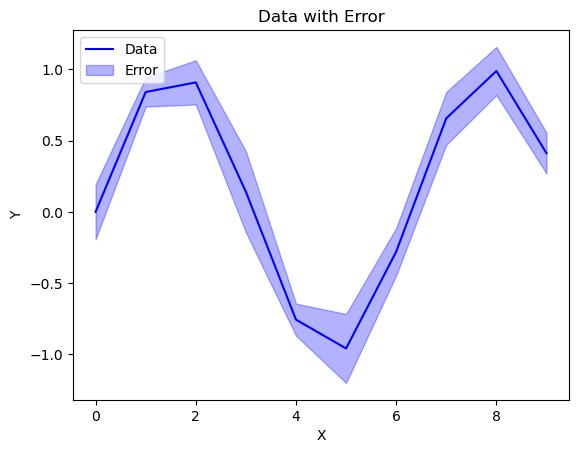

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
x = np.arange(10)
y = np.sin(x)
errors = np.random.uniform(0.1, 0.3, size=len(x))  # Example error values

# Plotting the shaded area
plt.plot(x, y, color='b', label='Data')
plt.fill_between(x, y - errors, y + errors, color='b', alpha=0.3, label='Error')

# Other plot configurations
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data with Error')
plt.legend()

# Display the plot
plt.show()


#  test the power law librairie

In [10]:
import pandas as pd
import numpy as np
import powerlaw
sr_fake = np.random.exponential(1,int(1e5))
powerlaw_fit = powerlaw.Fit(sr_fake, xmin=1)

In [11]:
powerlaw_fit.distribution_compare(
     "exponential", "power_law", normalized_ratio=True
)

(44.29930706890895, 0.0)

In [12]:
powerlaw_fit.distribution_compare(
     "power_law","exponential", normalized_ratio=True
)

(-44.29930706890895, 0.0)

In [13]:
powerlaw_fit.distribution_compare(
     "power_law", "truncated_power_law", normalized_ratio=True
)

Assuming nested distributions


(-63.470224626718185, 0.0)

In [14]:
powerlaw_fit.distribution_compare(
     "truncated_power_law", "exponential", normalized_ratio=True
)

(-9.590864299607903, 8.735018341337445e-22)

In [15]:
powerlaw_fit.truncated_power_law.alpha

1.000000024897637

In [16]:
powerlaw_fit.power_law.alpha

2.6878179424498874

In [17]:
powerlaw_fit.exponential.Lambda

1.0060108275159771

(array([7.0642e+04, 2.0803e+04, 6.0200e+03, 1.7570e+03, 5.4700e+02,
        1.5500e+02, 4.7000e+01, 1.6000e+01, 1.1000e+01, 2.0000e+00]),
 array([1.12358211e-05, 1.22513904e+00, 2.45026684e+00, 3.67539465e+00,
        4.90052245e+00, 6.12565025e+00, 7.35077805e+00, 8.57590586e+00,
        9.80103366e+00, 1.10261615e+01, 1.22512893e+01]),
 <BarContainer object of 10 artists>)

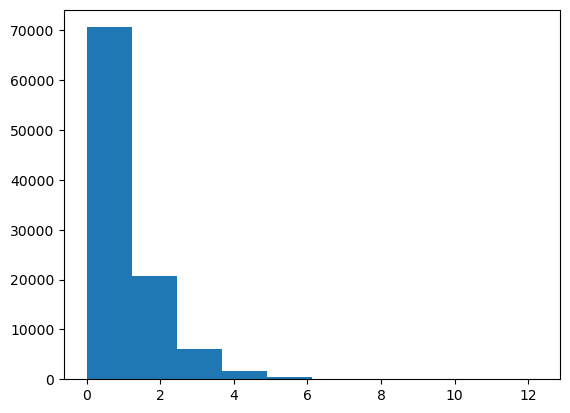

In [23]:
import matplotlib.pyplot as plt
plt.hist(sr_fake)